In [1]:
import datetime
import logging
import os

In [2]:
import numpy as np 
import tensorflow as tf

In [3]:
from tensorflow.keras import activations
from tensorflow.keras import callbacks
from tensorflow.keras import layers
from tensorflow.keras import models

from tensorflow import feature_column as fc

In [4]:
logging.info(tf.version.VERSION)

In [5]:
import pandas as pd 

In [6]:
!pwd

/Users/yanchunyang/Documents/training/learning_datasets


In [7]:
df = pd.read_csv("~/Downloads/df_data_test.csv")

In [8]:
df.columns

Index(['Unnamed: 0', 'USER_ID', 'PLATFORM', 'ATTRIBUTION', 'NETWORK',
       'BOD_ACCOUNT_OPEN_USER', 'BOD_DIRECT_DEPOSIT_USER', 'BANK_CATEGORY',
       'HAS_VALID_CREDENTIALS', 'APPROVED_BANK_COUNT', 'FIRST_TRANS',
       'FREQUENCY', 'RECENCY', 'T', 'MONETARY', 'MONETARY_TOTAL', 'MAX_REV',
       'MAX_PRINCIPLE', 'NOT_BAKED', 'SETTLEMENT_DATE_DEV',
       'DISBURSE_DATE_DEV', 'NET_REV_DEV', 'SLOPE', 'INTERCEPT',
       'SETTLED_RATE', 'OUTSTANDING_AMOUNT', 'SUMREVENUE', 'SUMPLEDGE',
       'MONTHLY_INCOME', 'PRIOR_REVENUE', 'FORECAST_DATE', 'IF_RETENTION'],
      dtype='object')

In [9]:
df.head(3)

,Unnamed: 0,USER_ID,PLATFORM,ATTRIBUTION,NETWORK,BOD_ACCOUNT_OPEN_USER,BOD_DIRECT_DEPOSIT_USER,BANK_CATEGORY,HAS_VALID_CREDENTIALS,APPROVED_BANK_COUNT,...,SLOPE,INTERCEPT,SETTLED_RATE,OUTSTANDING_AMOUNT,SUMREVENUE,SUMPLEDGE,MONTHLY_INCOME,PRIOR_REVENUE,FORECAST_DATE,IF_RETENTION
0,0,8802649,android,ORGANIC,NaN,1,0,NaN,False,7,...,-0.040549,23.189082,0.544286,3.81,3.24,3.24,166.949997,1.99,2022-10-01,1
1,1,4737076,ios,ORGANIC,Website Tracking,1,0,traiditonal,True,3,...,-0.011778,25.111236,0.000000,0.00,35.31,35.31,0.000000,9.97,2022-10-01,1
2,2,481951,ios,ORGANIC,Organic,1,0,traiditonal,False,2,...,0.118659,-22.058654,0.000000,0.00,28.96,28.96,3791.489990,16.98,2022-10-01,1


In [96]:
categorical_columns = ['PLATFORM', 'ATTRIBUTION', 'NETWORK','BANK_CATEGORY','FIRST_TRANS', 'FORECAST_DATE']
numerical_columns = ['BOD_ACCOUNT_OPEN_USER', 'BOD_DIRECT_DEPOSIT_USER',
                     'HAS_VALID_CREDENTIALS', 'APPROVED_BANK_COUNT',
                     'FREQUENCY', 'RECENCY', 'T', 'MONETARY', 
                     'MONETARY_TOTAL', 'MAX_REV',
                     'MAX_PRINCIPLE', 'SETTLEMENT_DATE_DEV',
                     'DISBURSE_DATE_DEV', 'NET_REV_DEV', 'SLOPE', 'INTERCEPT',
                     'SETTLED_RATE', 'OUTSTANDING_AMOUNT','PRIOR_REVENUE']


In [21]:
label_column = 'SUMREVENUE'

In [15]:
df.loc[:, categorical_columns].head(4)

,PLATFORM,ATTRIBUTION,NETWORK,BANK_CATEGORY,FIRST_TRANS,FORECAST_DATE
0,android,ORGANIC,NaN,NaN,2020-12-12,2022-10-01
1,ios,ORGANIC,Website Tracking,traiditonal,2019-10-09,2022-10-01
2,ios,ORGANIC,Organic,traiditonal,2018-06-02,2022-10-01
3,android,ORGANIC,Organic,CHIME,2020-02-20,2022-10-01


In [81]:
for col in categorical_columns:
    print(len(df[col].unique()))

3
4
107
4
2246
12


In [20]:
defaults = [['null'],
 ['null'],
 ['null'],
 ['null'],
 ['null'],
 ['null'],
 [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0],
  [0.0]]


In [24]:
dfupdate = df.loc[:, categorical_columns + numerical_columns]

In [27]:
dfupdate.to_csv("~/Downloads/dfupdate.csv")

In [346]:
columns = list(dfupdate.columns)

In [319]:
patterns = "/Users/yanchunyang/Downloads/dfupdate.csv"

In [308]:
print(columns)

Index(['PLATFORM', 'ATTRIBUTION', 'NETWORK', 'BANK_CATEGORY', 'FIRST_TRANS',
       'FORECAST_DATE', 'BOD_ACCOUNT_OPEN_USER', 'BOD_DIRECT_DEPOSIT_USER',
       'HAS_VALID_CREDENTIALS', 'APPROVED_BANK_COUNT', 'FREQUENCY', 'RECENCY',
       'T', 'MONETARY', 'MONETARY_TOTAL', 'MAX_REV', 'MAX_PRINCIPLE',
       'SETTLEMENT_DATE_DEV', 'DISBURSE_DATE_DEV', 'NET_REV_DEV', 'SLOPE',
       'INTERCEPT', 'SETTLED_RATE', 'OUTSTANDING_AMOUNT', 'PRIOR_REVENUE',
       'SUMREVENUE'],
      dtype='object')


In [103]:
def features_and_labels(row_data):
    label = row_data.pop(label_column)
    return row_data,label

In [334]:
defaults

[['null'],
 ['null'],
 ['null'],
 ['null'],
 ['null'],
 ['null'],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0]]

In [348]:
columnsupdate = ['index'] + columns 

In [350]:
columnsupdate

['index',
 'PLATFORM',
 'ATTRIBUTION',
 'NETWORK',
 'BANK_CATEGORY',
 'FIRST_TRANS',
 'FORECAST_DATE',
 'BOD_ACCOUNT_OPEN_USER',
 'BOD_DIRECT_DEPOSIT_USER',
 'HAS_VALID_CREDENTIALS',
 'APPROVED_BANK_COUNT',
 'FREQUENCY',
 'RECENCY',
 'T',
 'MONETARY',
 'MONETARY_TOTAL',
 'MAX_REV',
 'MAX_PRINCIPLE',
 'SETTLEMENT_DATE_DEV',
 'DISBURSE_DATE_DEV',
 'NET_REV_DEV',
 'SLOPE',
 'INTERCEPT',
 'SETTLED_RATE',
 'OUTSTANDING_AMOUNT',
 'PRIOR_REVENUE',
 'SUMREVENUE']

In [351]:
def load_dataset(pattern, batch_size, num_repeat):
    
    dataset = tf.data.experimental.make_csv_dataset(
        file_pattern=pattern,
        batch_size=batch_size,
        column_names=columnsupdate,
        num_epochs = num_repeat,
    )

    dataset = dataset.map(map_func=features_and_labels)
    return dataset
    

In [352]:
def create_train_dataset(pattern, batch_size):
    dataset = load_dataset(pattern, batch_size, num_repeat=None)
    return dataset.prefetch(1)

In [338]:
dfupdate.head(10)

,PLATFORM,ATTRIBUTION,NETWORK,BANK_CATEGORY,FIRST_TRANS,FORECAST_DATE,BOD_ACCOUNT_OPEN_USER,BOD_DIRECT_DEPOSIT_USER,HAS_VALID_CREDENTIALS,APPROVED_BANK_COUNT,...,MAX_PRINCIPLE,SETTLEMENT_DATE_DEV,DISBURSE_DATE_DEV,NET_REV_DEV,SLOPE,INTERCEPT,SETTLED_RATE,OUTSTANDING_AMOUNT,PRIOR_REVENUE,SUMREVENUE
0,android,ORGANIC,NaN,NaN,2020-12-12,2022-10-01,1,0,False,7,...,20.0,37.629143,190.075277,1.715191,-0.040549,23.189082,0.544286,3.81,1.99,3.24
1,ios,ORGANIC,Website Tracking,traiditonal,2019-10-09,2022-10-01,1,0,True,3,...,75.0,65.701391,421.440486,0.636189,-0.011778,25.111236,0.000000,0.00,9.97,35.31
2,ios,ORGANIC,Organic,traiditonal,2018-06-02,2022-10-01,1,0,False,2,...,250.0,3.123873,351.336234,2.511124,0.118659,-22.058654,0.000000,0.00,16.98,28.96
3,android,ORGANIC,Organic,CHIME,2020-02-20,2022-10-01,1,0,True,1,...,150.0,4.896375,261.285172,7.210749,0.123725,20.773397,0.000000,0.00,213.65,107.97
4,ios,PAID,Apple Search Ads,traiditonal,2021-11-29,2022-10-01,1,0,True,1,...,250.0,4.123106,97.001964,6.755485,0.151439,173.327756,0.000000,0.00,40.93,33.96
5,android,PAID,Adwords,NaN,2020-09-03,2022-10-01,0,0,False,1,...,75.0,124.723695,338.941490,8.654481,0.110691,4.882479,0.000000,0.00,39.98,0.00
6,ios,PAID,Apple Search Ads,traiditonal,2021-03-12,2022-10-01,1,0,False,2,...,125.0,25.976271,228.642569,4.720001,-0.140575,95.576940,0.000000,0.00,-110.24,0.00
7,android,ORGANIC,Organic,CHIME,2021-11-03,2022-10-01,1,0,False,1,...,75.0,27.073357,28.076681,8.037497,0.030913,56.676522,0.682222,21.49,0.00,0.00
8,ios,ORGANIC,Organic,traiditonal,2021-10-03,2022-10-01,0,0,False,1,...,200.0,2.263446,78.618806,39.128679,0.283437,-171.549960,0.951408,195.99,65.89,0.00
9,android,PAID,Adwords,traiditonal,2022-06-26,2022-10-01,1,0,False,1,...,125.0,4.787136,28.565714,2.229069,1.190441,42.926029,0.000000,0.00,39.69,-19.57


In [343]:
dfupdate.shape

(2400055, 26)

In [34]:
! pwd

/Users/yanchunyang/Documents/training/learning_datasets


In [324]:
dfupdate.head(10)

,PLATFORM,ATTRIBUTION,NETWORK,BANK_CATEGORY,FIRST_TRANS,FORECAST_DATE,BOD_ACCOUNT_OPEN_USER,BOD_DIRECT_DEPOSIT_USER,HAS_VALID_CREDENTIALS,APPROVED_BANK_COUNT,...,MAX_PRINCIPLE,SETTLEMENT_DATE_DEV,DISBURSE_DATE_DEV,NET_REV_DEV,SLOPE,INTERCEPT,SETTLED_RATE,OUTSTANDING_AMOUNT,PRIOR_REVENUE,SUMREVENUE
0,android,ORGANIC,NaN,NaN,2020-12-12,2022-10-01,1,0,False,7,...,20.0,37.629143,190.075277,1.715191,-0.040549,23.189082,0.544286,3.81,1.99,3.24
1,ios,ORGANIC,Website Tracking,traiditonal,2019-10-09,2022-10-01,1,0,True,3,...,75.0,65.701391,421.440486,0.636189,-0.011778,25.111236,0.000000,0.00,9.97,35.31
2,ios,ORGANIC,Organic,traiditonal,2018-06-02,2022-10-01,1,0,False,2,...,250.0,3.123873,351.336234,2.511124,0.118659,-22.058654,0.000000,0.00,16.98,28.96
3,android,ORGANIC,Organic,CHIME,2020-02-20,2022-10-01,1,0,True,1,...,150.0,4.896375,261.285172,7.210749,0.123725,20.773397,0.000000,0.00,213.65,107.97
4,ios,PAID,Apple Search Ads,traiditonal,2021-11-29,2022-10-01,1,0,True,1,...,250.0,4.123106,97.001964,6.755485,0.151439,173.327756,0.000000,0.00,40.93,33.96
5,android,PAID,Adwords,NaN,2020-09-03,2022-10-01,0,0,False,1,...,75.0,124.723695,338.941490,8.654481,0.110691,4.882479,0.000000,0.00,39.98,0.00
6,ios,PAID,Apple Search Ads,traiditonal,2021-03-12,2022-10-01,1,0,False,2,...,125.0,25.976271,228.642569,4.720001,-0.140575,95.576940,0.000000,0.00,-110.24,0.00
7,android,ORGANIC,Organic,CHIME,2021-11-03,2022-10-01,1,0,False,1,...,75.0,27.073357,28.076681,8.037497,0.030913,56.676522,0.682222,21.49,0.00,0.00
8,ios,ORGANIC,Organic,traiditonal,2021-10-03,2022-10-01,0,0,False,1,...,200.0,2.263446,78.618806,39.128679,0.283437,-171.549960,0.951408,195.99,65.89,0.00
9,android,PAID,Adwords,traiditonal,2022-06-26,2022-10-01,1,0,False,1,...,125.0,4.787136,28.565714,2.229069,1.190441,42.926029,0.000000,0.00,39.69,-19.57


In [316]:
train_path = "/Users/yanchunyang/Downloads/dfupdate.csv"

In [359]:
trainds= create_train_dataset(train_path, 32)

In [360]:
next(trainds.take(1).as_numpy_iterator())

(OrderedDict([('index',
               array([1169, 7676, 9192, 4481, 6262, 1358,  767,  493, 2371, 6285, 6783,
                      5040, 7938, 1606,  132, 9847, 4901,  198, 5753, 1648, 9740, 5668,
                      6461, 9970, 8495, 1390, 5168, 7058,  947, 4209, 7042, 2098],
                     dtype=int32)),
              ('PLATFORM',
               array([b'ios', b'ios', b'android', b'ios', b'ios', b'android', b'ios',
                      b'android', b'ios', b'ios', b'ios', b'ios', b'ios', b'ios', b'ios',
                      b'ios', b'android', b'ios', b'android', b'android', b'android',
                      b'android', b'ios', b'ios', b'android', b'android', b'ios',
                      b'android', b'ios', b'ios', b'ios', b'android'], dtype=object)),
              ('ATTRIBUTION',
               array([b'ORGANIC', b'ORGANIC', b'ORGANIC', b'ORGANIC', b'PAID',
                      b'ORGANIC', b'ORGANIC', b'PAID', b'PAID', b'ORGANIC', b'ORGANIC',
                      b'OR

In [93]:
type(trainds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [94]:
print(trainds.element_spec)

(OrderedDict([('PLATFORM', TensorSpec(shape=(32,), dtype=tf.string, name=None)), ('ATTRIBUTION', TensorSpec(shape=(32,), dtype=tf.string, name=None)), ('NETWORK', TensorSpec(shape=(32,), dtype=tf.string, name=None)), ('BANK_CATEGORY', TensorSpec(shape=(32,), dtype=tf.string, name=None)), ('FIRST_TRANS', TensorSpec(shape=(32,), dtype=tf.string, name=None)), ('FORECAST_DATE', TensorSpec(shape=(32,), dtype=tf.string, name=None)), ('BOD_ACCOUNT_OPEN_USER', TensorSpec(shape=(32,), dtype=tf.float32, name=None)), ('BOD_DIRECT_DEPOSIT_USER', TensorSpec(shape=(32,), dtype=tf.float32, name=None)), ('HAS_VALID_CREDENTIALS', TensorSpec(shape=(32,), dtype=tf.float32, name=None)), ('APPROVED_BANK_COUNT', TensorSpec(shape=(32,), dtype=tf.float32, name=None)), ('FREQUENCY', TensorSpec(shape=(32,), dtype=tf.float32, name=None)), ('RECENCY', TensorSpec(shape=(32,), dtype=tf.float32, name=None)), ('T', TensorSpec(shape=(32,), dtype=tf.float32, name=None)), ('MONETARY', TensorSpec(shape=(32,), dtype=tf.fl

In [71]:
def transform(inputs, categorical_columns, numerical_columns):
    transformed = inputs.copy()
    del transformed['FIRST_TRANS']
    del transformed['FORECAST_DATE']
    feature_columns = {
        colname:fc.numeric_column(colname) for colname in numerical_columns
    }
    for col in ['FIRST_TRANS', 'FORECAST_DATE']:
        transformed[col+'_number'] = layers.Lambda(
            lambda x: tf.strings.to_numer(tf.strings.substr(x, 5, 2), out_type=tf.dtypes.int32), output_shape=(1,))(inputs[col])
        feature_columns[col+'number'] = fc.indicator_column(fc.categorical_column_with_identity(col+'_number', num_buckets=12))
    return transformed, feature_columns

In [295]:
inputs = {
            colname: layers.Input(name=colname, shape=(1,), dtype='float32') 
              for colname in numerical_columns
            }

In [296]:
inputs.update({
    colname: layers.Input(name=colname, shape=(1,), dtype='string') for colname in categorical_columns})

In [83]:
num_tokens = {}
values = [3, 4, 107, 4]
for col in categorical_columns[0:-2]:
    num_tokens[col] = values[0]
    values.pop(0)

In [84]:
num_tokens

{'PLATFORM': 3, 'ATTRIBUTION': 4, 'NETWORK': 107, 'BANK_CATEGORY': 4}

In [478]:
vocab_list = {}
for col in categorical_columns[:-2]:
    vocab_list[col] = list(dfupdate[col].unique())

In [273]:
numerical_columns = ['BOD_ACCOUNT_OPEN_USER', 'BOD_DIRECT_DEPOSIT_USER', 
                      'APPROVED_BANK_COUNT', 'FREQUENCY', 'RECENCY', 'T', 'MONETARY', 'MONETARY_TOTAL', 'MAX_REV', 'MAX_PRINCIPLE', 'SETTLEMENT_DATE_DEV', 'DISBURSE_DATE_DEV', 'NET_REV_DEV', 'SLOPE', 'INTERCEPT', 'SETTLED_RATE', 'OUTSTANDING_AMOUNT', 'PRIOR_REVENUE']

In [479]:
def get_category_encoding_layer(name, vocab, num_token):
  # Create a layer that turns strings into integer indices.

    index = layers.StringLookup(vocabulary=vocab)
  

    encoder = layers.CategoryEncoding(num_tokens=num_token)

 
    return lambda feature: encoder(index(feature))

In [480]:
def transform(inputs):
    outputs = {}
    encoded_feature=[]
    for col in numerical_columns:
        outputs[col] = inputs[col]
        encoded_feature.append(outputs[col])
    for col in ['FIRST_TRANS', 'FORECAST_DATE']:
        outputs[col] = layers.Lambda(lambda x: tf.strings.to_number(tf.strings.substr(x, 5, 2)), output_shape=(1,))(inputs[col])
        encoded_feature.append(outputs[col])
    for col in ['PLATFORM', 'ATTRIBUTION', 'NETWORK','BANK_CATEGORY']:
    
        outputs[col] = get_category_encoding_layer(col, vocab_list[col], num_tokens[col])(inputs[col])
        
        encoded_feature.append(outputs[col])

    outputs_update = tf.keras.layers.concatenate(encoded_feature)

    
    return outputs_update

In [481]:
x = transform(inputs)
for layer, nodes in enumerate(nnsize):
    x = layers.Dense(nodes, activation='relu', name='h{}'.format(layer))(inputs=x) 
output = layers.Dense(1, name='revenue')(x)
checkpoint_cb = callbacks.ModelCheckpoint(
        checkpoint_path,
        save_weights_only=True,
        verbose=1
    )


In [482]:
model = tf.keras.Model(inputs, output)

In [484]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

In [485]:
lr_optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=lr_optimizer, loss='mse', metrics=[rmse, 'mse'])
output_dir = "/Users/yanchunyang/Downloads/"
checkpoint_path = os.path.join(output_dir, 'checkpoints.weights.h5')
tensorboard_path = os.path.join(output_dir, 'tensorboard')
tensorboard_cb = callbacks.TensorBoard(tensorboard_path)

In [ ]:
history = model.fit(
    trainds,
    epochs=10,
    callbacks=[checkpoint_cb, tensorboard_cb]
)

Epoch 1/10


2024-05-04 12:05:14.796150: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] fused(ShuffleDatasetV3:175,RepeatDataset:176): Filling up shuffle buffer (this may take a while): 4384 of 10000
2024-05-04 12:05:34.794535: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] fused(ShuffleDatasetV3:175,RepeatDataset:176): Filling up shuffle buffer (this may take a while): 8183 of 10000
2024-05-04 12:05:51.374257: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


124461047/Unknown 94817s 761us/step - loss: 14920.2520 - mse: 14920.2520 - rmse: 138.2600

In [256]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

In [257]:
def forward_pass(x):
    for layer, nodes in enumerate(nnsize):
        x = layers.Dense(nodes, activation='relu', name='h{}'.format(layer))(x) 
    output = layers.Dense(1, name='revenue')(x)
    return output

In [258]:
outputs = forward_pass(allfeatures)

In [259]:
model = tf.keras.Model(inputs, outputs)

In [260]:
model.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ PLATFORM            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ATTRIBUTION         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ NETWORK             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ BANK_CATEGORY       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ BOD_ACCOUNT_OPEN_U… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ BOD_DIRECT_DEPOSIT… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ HAS_VALID_CREDENTI… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ APPROVED_BANK_COUNT │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FREQUENCY           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ RECENCY             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ T (InputLayer)      │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ MONETARY            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ MONETARY_TOTAL      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ MAX_REV             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ MAX_PRINCIPLE       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ SETTLEMENT_DATE_DEV │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DISBURSE_DATE_DEV   │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                 

 Total params: 4,689 (18.32 KB)

 Trainable params: 4,689 (18.32 KB)

 Non-trainable params: 0 (0.00 B)

In [261]:
lr_optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

In [262]:
model.compile(optimizer=lr_optimizer, loss='mse', metrics=[rmse, 'mse'])

In [263]:
output_dir = "/Users/yanchunyang/Downloads/"

In [264]:
checkpoint_path = os.path.join(output_dir, 'checkpoints.weights.h5')
tensorboard_path = os.path.join(output_dir, 'tensorboard')

In [265]:
checkpoint_cb = callbacks.ModelCheckpoint(
        checkpoint_path,
        save_weights_only=True,
        verbose=1
    )

In [266]:
tensorboard_cb = callbacks.TensorBoard(tensorboard_path)

In [267]:
history = model.fit(
    trainds,
    epochs=10,
    callbacks=[checkpoint_cb, tensorboard_cb]
)

Epoch 1/10


2024-05-03 18:06:23.373424: W tensorflow/core/framework/op_kernel.cc:1816] OP_REQUIRES failed at cast_op.cc:122 : UNIMPLEMENTED: Cast string to float is not supported


UnimplementedError: Graph execution error:

Detected at node functional_23_1/Cast defined at (most recent call last):
  File "/opt/homebrew/Cellar/python@3.10/3.10.6_1/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/opt/homebrew/Cellar/python@3.10/3.10.6_1/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 86, in _run_code

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/opt/homebrew/Cellar/python@3.10/3.10.6_1/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/base_events.py", line 600, in run_forever

  File "/opt/homebrew/Cellar/python@3.10/3.10.6_1/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once

  File "/opt/homebrew/Cellar/python@3.10/3.10.6_1/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/var/folders/d1/rw6rwxz927g254dvggnj0jpr0000gn/T/ipykernel_69424/3573989366.py", line 1, in <module>

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 314, in fit

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 117, in one_step_on_iterator

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 104, in one_step_on_data

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 51, in train_step

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/keras/src/layers/layer.py", line 842, in __call__

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/keras/src/ops/operation.py", line 48, in __call__

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/keras/src/models/functional.py", line 199, in call

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/keras/src/ops/function.py", line 151, in _run_through_graph

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/keras/src/models/functional.py", line 589, in call

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py", line 28, in __call__

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/keras/src/tree/tree_api.py", line 148, in map_structure

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/keras/src/tree/optree_impl.py", line 79, in map_structure

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/optree/ops.py", line 594, in tree_map

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py", line 29, in <lambda>

  File "/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/keras/src/backend/tensorflow/core.py", line 120, in convert_to_tensor

Cast string to float is not supported
	 [[{{node functional_23_1/Cast}}]] [Op:__inference_one_step_on_iterator_5156]

In [ ]:
for layer, nodes in enumerate(nnsize):
    x = layers.Dense(nodes, activation='relu', name='h{}'.format(layer))(inputs=x) 
output = layers.Dense(1, name='revenue')(x)

In [452]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  # Create a layer that turns strings into integer indices.
  if dtype == 'string':
    index = layers.StringLookup(max_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
  else:
    index = layers.IntegerLookup(max_tokens=max_tokens)

  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Encode the integer indices.
  encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply multi-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))

In [453]:
encoded_features = []
all_inputs = []

In [454]:
for header in categorical_columns:
    categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
    encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=trainds,
                                               dtype='string',
                                               max_tokens=num_tokens[col])
    encoded_categorical_col = encoding_layer(categorical_col)
    all_inputs.append(categorical_col)
    encoded_features.append(encoded_categorical_col)

KeyboardInterrupt: 

In [461]:
num_tokens

{'PLATFORM': 3, 'ATTRIBUTION': 4, 'NETWORK': 107, 'BANK_CATEGORY': 4}

In [458]:
vocab_list = {}
for col in categorical_columns[:-2]:
    vocab_list[col] = list(dfupdate[col].unique())

In [462]:
def get_category_encoding_layer(name, vocab, num_token):
  # Create a layer that turns strings into integer indices.

    index = layers.StringLookup(vocabulary=vocab)
  

    encoder = layers.CategoryEncoding(num_tokens=num_token)

 
    return lambda feature: encoder(index(feature))

In [463]:
categorical_cols = categorical_columns[0:-2]

In [464]:
categorical_cols

['PLATFORM', 'ATTRIBUTION', 'NETWORK', 'BANK_CATEGORY']

In [465]:
all_inputs = []
encoded_features = []

In [469]:
for header in categorical_cols:
  categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
  encoding_layer = get_category_encoding_layer(header,
                                               vocab_list[header],
                                               num_tokens[header])
                                               
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)

In [470]:
all_features = tf.keras.layers.concatenate(encoded_features)

In [471]:
x = tf.keras.layers.Dense(32, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(all_inputs, output)

In [477]:
model.summary()

Model: "functional_75"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ PLATFORM            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ATTRIBUTION         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ NETWORK             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ BANK_CATEGORY       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_lookup_1     │ (None, 1)         │          0 │ PLATFORM[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_lookup_2     │ (None, 1)         │          0 │ ATTRIBUTION[0][0] │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_lookup_3     │ (None, 1)         │          0 │ NETWORK[0][0]     │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_lookup_4     │ (None, 1)         │          0 │ BANK_CATEGORY[0]… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ category_encoding_… │ (None, 3)         │          0 │ string_lookup_1[… │
│ (CategoryEncoding)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ category_encoding_… │ (None, 4)         │          0 │ string_lookup_2[… │
│ (CategoryEncoding)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ category_encoding_… │ (None, 107)       │          0 │ string_lookup_3[… │
│ (CategoryEncoding)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ category_encoding_… │ (None, 4)         │          0 │ string_lookup_4[… │
│ (CategoryEncoding)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_59      │ (None, 118)       │          0 │ category_encodin… │
│ (Concatenate)       │                   │            │ category_encodin… │
│                     │                   │            │ category_encodin… │
│                     │                   │            │ category_encodin… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │      3,808 │ concatenate_59[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 32)        │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │         33 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,525 (45.02 KB)

 Trainable params: 3,841 (15.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,684 (30.02 KB)

In [475]:
model.compile(optimizer='adam', loss='mse', metrics=[rmse, 'mse'])

In [476]:
model.fit(trainds, epochs=10, validation_data=trainds)

Epoch 1/10
   4184/Unknown 16s 3ms/step - loss: 6811.2983 - mse: 6811.2983 - rmse: 79.1747

KeyboardInterrupt: 

In [488]:
def create_query():
    query_string1 = """
    WITH
    payment AS (
        SELECT * FROM SANDBOX.DEV_YYANG_DBT_marts.fct_payments
    ),
    
    advance AS (
        SELECT * FROM SANDBOX.DEV_YYANG_DBT_marts.fct_advances
    ),
    
    final AS (
        SELECT
            a.advance_id                        AS advance_id,
            a.user_id,
            a.disbursement_ds,
            --a.payback_ds_pst as payback_date,
            a.original_payback_date             AS payback_date,
            a.amount_due,
            a.advance_amount,
            a.fee,
            a.tip,
            SUM(p.payment_amount)               AS total_settled_amount,
            COUNT(DISTINCT p.payment_id)        AS payment_count,
        """
    query_string2 = """ """
    for n_day in range(1, 361):
        tmp_string = f"""
        LEAST( -- "least" is to ignore the settled $ amount over amount_due
            COALESCE(
                SUM(
                    IFF(TO_DATE(p.payment_ts) <= DATEADD(DAY, { n_day }, a.original_payback_date), p.payment_amount, 0)
                    )
                , 0)
            , a.amount_due)
            AS settled_{ n_day }_days_after_due,

        LEAST( -- "least" is to ignore the settled $ amount over amount_due
            COALESCE(
                SUM(
                    IFF(TO_DATE(p.payment_ts) <= DATEADD(DAY, { n_day }, a.disbursement_ds), p.payment_amount, 0)
                    )
                , 0)
            , a.amount_due)
            AS settled_{ n_day }_days_after_disbursement,
            
        """
        query_string2 += tmp_string

    query_string3 = """
    DATEDIFF(DAY, a.original_payback_date, CURRENT_DATE) AS days_since_payback

    FROM advance AS a
        LEFT JOIN payment AS p ON
            a.advance_id = p.advance_id
    WHERE a.disbursement_ds >= '2020-12-31'
    GROUP BY
            1, 2, 3, 4, 5, 6, 7, 8, DATEDIFF(DAY, a.original_payback_date, CURRENT_DATE)
    )
    
    SELECT * FROM final
    """
    return query_string1 + query_string2 + query_string3

In [489]:
querystr = create_query()

In [490]:
print(querystr)


    WITH
    payment AS (
        SELECT * FROM SANDBOX.DEV_YYANG_DBT_marts.fct_payments
    ),
    
    advance AS (
        SELECT * FROM SANDBOX.DEV_YYANG_DBT_marts.fct_advances
    ),
    
    final AS (
        SELECT
            a.advance_id                        AS advance_id,
            a.user_id,
            a.disbursement_ds,
            --a.payback_ds_pst as payback_date,
            a.original_payback_date             AS payback_date,
            a.amount_due,
            a.advance_amount,
            a.fee,
            a.tip,
            SUM(p.payment_amount)               AS total_settled_amount,
            COUNT(DISTINCT p.payment_id)        AS payment_count,
         
        LEAST( -- "least" is to ignore the settled $ amount over amount_due
            COALESCE(
                SUM(
                    IFF(TO_DATE(p.payment_ts) <= DATEADD(DAY, 1, a.original_payback_date), p.payment_amount, 0)
                    )
                , 0)
            , a.amount_due)
 

In [491]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [492]:
!pwd

/Users/yanchunyang/Documents/training/learning_datasets


In [493]:
!ls


ltv_tf_version.ipynb taxi-valid.csv
taxi-train.csv       taxifare.ipynb


In [494]:
type(zip_path)

str

In [495]:
print(zip_path)

/Users/yanchunyang/.keras/datasets/jena_climate_2009_2016.csv.zip


In [496]:
print(csv_path)

/Users/yanchunyang/.keras/datasets/jena_climate_2009_2016.csv


In [497]:
df = pd.read_csv(csv_path)

In [498]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [499]:
df.head(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


In [500]:
df = df[5::6]

In [501]:
df.shape

(70091, 15)

In [504]:
df.head(10)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
35,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
41,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
47,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
53,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2
59,1000.27,-7.04,266.10,-8.17,91.6,3.60,3.30,0.30,2.05,3.29,1307.76,1.45,3.00,292.6


In [503]:
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [508]:
import matplotlib as mpl
import matplotlib.pyplot as plt

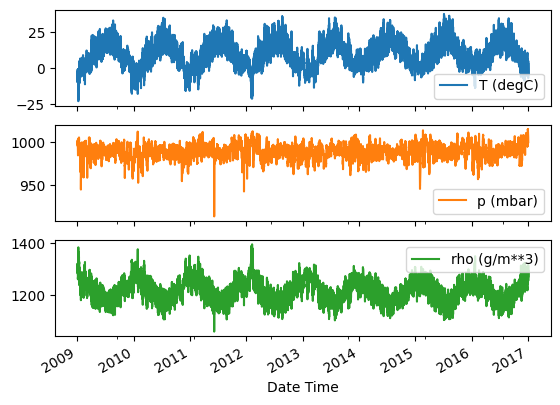

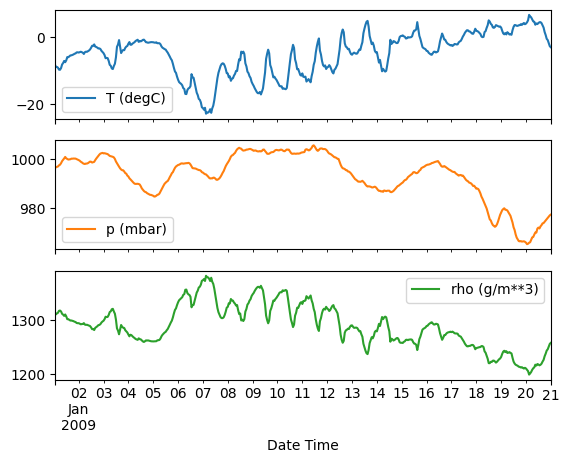

In [509]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [518]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


In [511]:
df.shape

(70091, 14)

In [512]:
wv = df['wv (m/s)']
bad_wv = wv== - 9999.00

In [513]:
type(bad_wv)

pandas.core.series.Series

In [515]:
wv[bad_wv] = 0.0

In [517]:
max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

In [519]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

In [520]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [522]:
timestamp_s[0:10]

5     1.230772e+09
11    1.230775e+09
17    1.230779e+09
23    1.230782e+09
29    1.230786e+09
35    1.230790e+09
41    1.230793e+09
47    1.230797e+09
53    1.230800e+09
59    1.230804e+09
Name: Date Time, dtype: float64

In [523]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

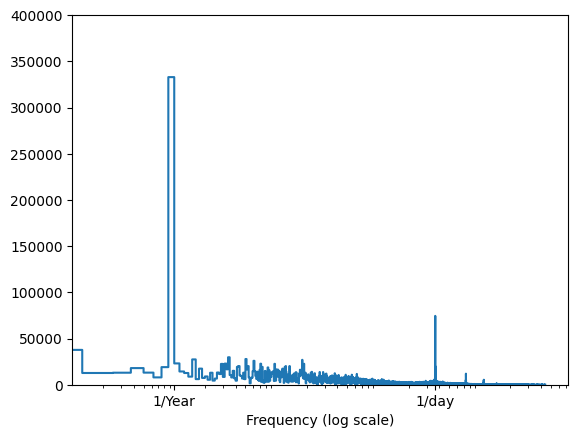

In [524]:
fft = tf.signal.rfft(df['T (degC)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [525]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [526]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [530]:
import seaborn as sns

/var/folders/d1/rw6rwxz927g254dvggnj0jpr0000gn/T/ipykernel_69424/3214313372.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


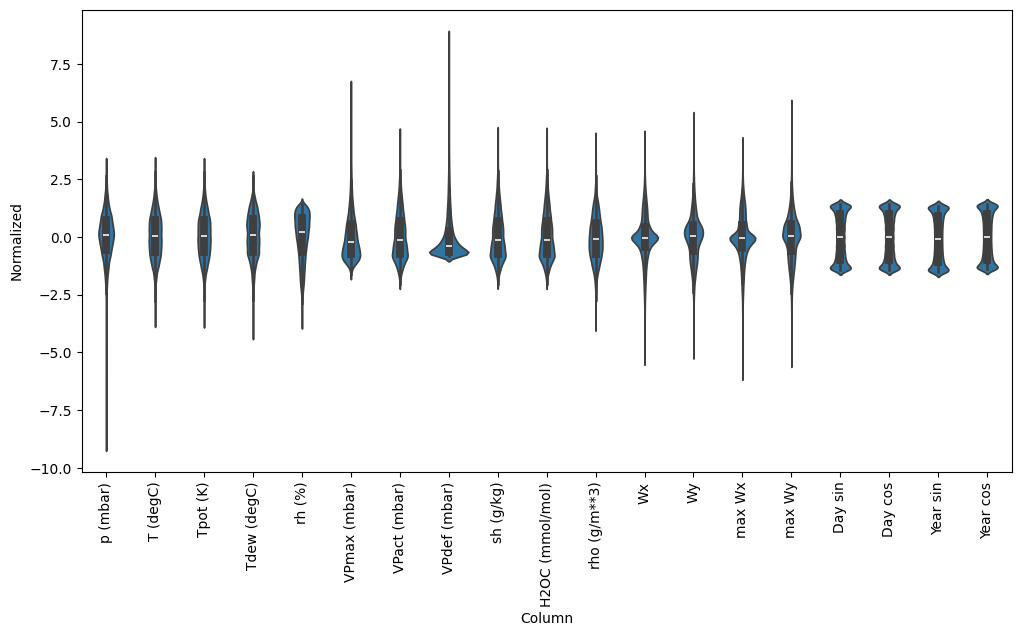

In [531]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [571]:
print(label_column)

SUMREVENUE


In [577]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=None):
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df 

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)} 
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)} 

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift 

        self.total_window_size = input_width + shift 
        
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width 
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return('\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}']))

    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
   
        if self.label_columns is not None:
            labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],axis=-1)

        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
                                 
 

In [536]:
t = np.arange(100)[slice(0, 10)]

In [538]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['T (degC)'])

In [578]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['T (degC)'])

In [574]:
print(str(w2))

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['T (degC)']


In [582]:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

In [576]:
example_inputs, example_labels = w2.split_window(example_window)

['T (degC)']


In [579]:
type(example_inputs)

tensorflow.python.framework.ops.EagerTensor

In [583]:
type(example_window)

tensorflow.python.framework.ops.EagerTensor

In [586]:
example_window.shape

TensorShape([3, 7, 19])

In [587]:
print(example_window[0, 0, :])

tf.Tensor(
[ 0.9453076  -1.98247323 -2.04188844 -1.91897277  1.11710152 -1.30285119
 -1.47732321 -0.79042362 -1.48003637 -1.48269721  2.21852381  0.19340924
  0.22116129  0.11114045  0.21792787  0.36611056  1.3660688  -0.06105236
  1.42843408], shape=(19,), dtype=float64)


In [588]:
train_df.shape

(49063, 19)

In [590]:
train_df.columns

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'Wx', 'Wy', 'max Wx', 'max Wy',
       'Day sin', 'Day cos', 'Year sin', 'Year cos'],
      dtype='object')

In [591]:
example_inputs.shape

TensorShape([3, 6, 19])

In [592]:
example_labels.shape

TensorShape([3, 1, 1])

In [593]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [594]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [595]:
w2.train.element_spec

(TensorSpec(shape=(None, 6, 19), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [596]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 1, 1)


2024-05-07 21:49:38.389305: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [597]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [598]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['T (degC)'])

In [601]:
example_window.shape

TensorShape([3, 7, 19])

In [603]:
example_inputs, example_labels = w2.split_window(example_window)

In [605]:
example_labels.shape

TensorShape([3, 1, 1])

In [604]:
example_inputs.shape

TensorShape([3, 6, 19])

In [607]:
tmp = w2.example

In [611]:
tmp[0].shape

TensorShape([32, 6, 19])

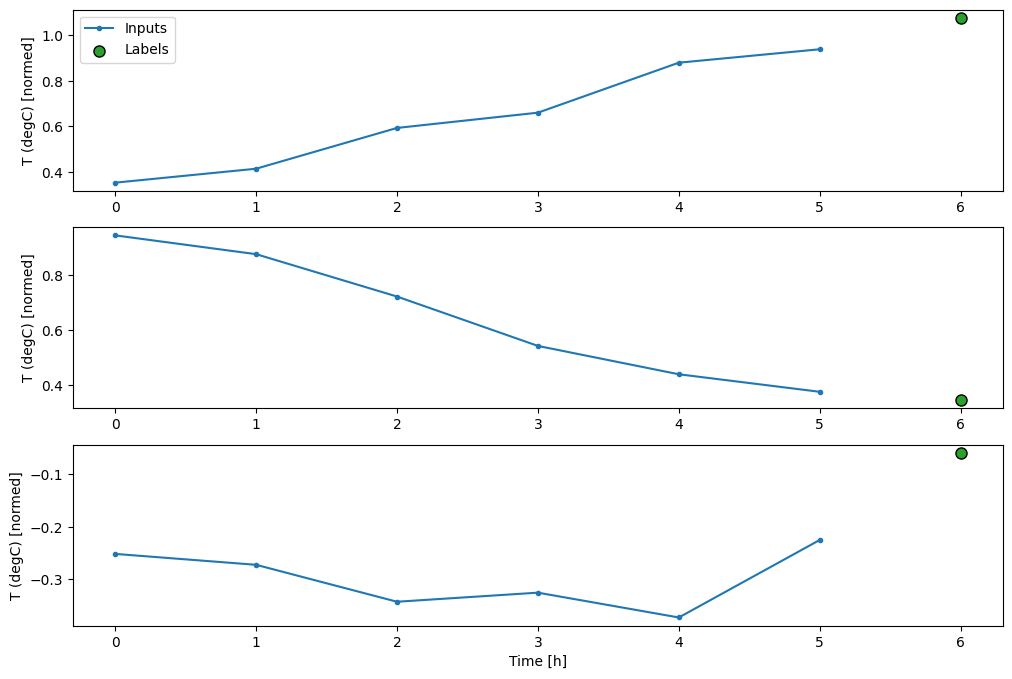

In [612]:
w2.plot()

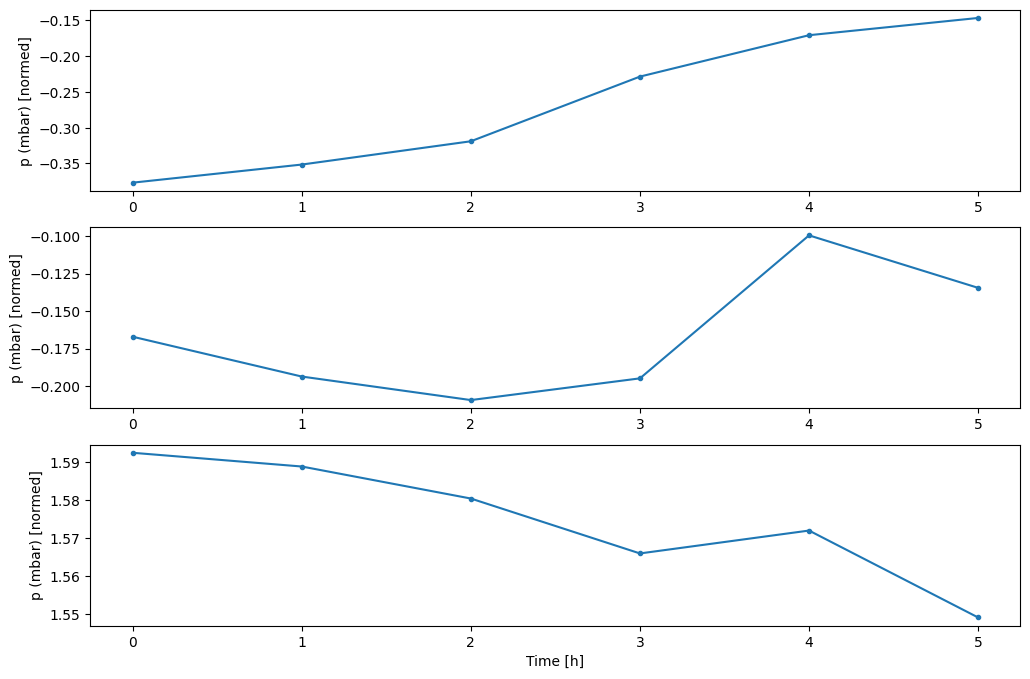

In [613]:
w2.plot(plot_col='p (mbar)')

In [614]:
w2.train.element_spec

(TensorSpec(shape=(None, 6, 19), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [615]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 1, 1)


2024-05-08 11:21:49.995244: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [616]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [617]:
tmp = pd.read_csv("~/Downloads/mode_collections_reports_analysis-query_5-ab39e22df69e-2024-05-09-20-15-46.csv")

In [618]:
tmp.columns

Index(['COLLECTION_NAME', 'REPORT_ID', 'REPORT_NAME', 'CREATOR', 'EMAIL',
       'VIEWED_AT_UTC', 'VIEWER_ID', 'VIEWER_NAME', 'VIEWER_EMAIL'],
      dtype='object')

In [621]:
tmpgroup = tmp.groupby(['REPORT_NAME', 'VIEWER_NAME']).agg({'REPORT_ID':'count'}).reset_index().sort_values(['REPORT_NAME', 'REPORT_ID'])

In [623]:
!pwd

/Users/yanchunyang/Documents/training/learning_datasets
